In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

In [2]:
%run lingam.py

Make Sample Data

In [3]:
size = 1000

np.random.seed(2017)
x = np.random.uniform(size=size)

np.random.seed(1028)
y = 2*x + np.random.uniform(size=size)

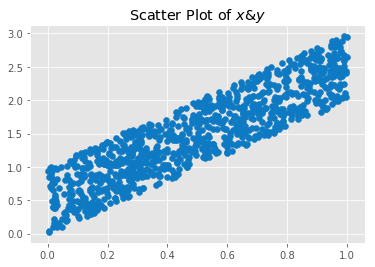

In [4]:
plt.scatter(x,y,color="#0E7AC4")
plt.title("Scatter Plot of $x$&$y$")
plt.show()

Use Lingam

In [5]:
#use kurtosis base ICA
X = pd.DataFrame(np.asarray([x,y]).T,columns=["x","y"])
lingam = LiNGAM()
lingam.fit(X)

x ---|2.018|---> y


/Users/Chang/.pyenv/versions/3.5.1/envs/lingam_env/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([[ 0.        ,  0.        ],
       [ 2.01848554,  0.        ]])

In [6]:
#use neg-entropy base ICA(robuster than kurtosis base)
lingam = LiNGAM()
lingam.fit(X,use_sklearn=True)

x ---|2.018|---> y


array([[ 0.        ,  0.        ],
       [ 2.01848554,  0.        ]])

### can apply more than 3 variables

In [7]:
size = 1000

np.random.seed(0)
x = np.random.uniform(size=size)

np.random.seed(1)
y = 0.4*x + np.random.uniform(size=size)

np.random.seed(2)
z = 0.1*x + -1*y  + np.random.uniform(size=size)

X = pd.DataFrame(np.asarray([x,y,z]).T,columns=["x","y","z"])

In [8]:
#use kurtosis base ICA
np.random.seed(28)
lingam = LiNGAM()
lingam.fit(X)

x ---|0.378|---> y
x ---|0.133|---> z
y ---|-1.016|---> z


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.37811124,  0.        ,  0.        ],
       [ 0.13286129, -1.01554318,  0.        ]])

In [9]:
#use neg-entropy base ICA(robuster than kurtosis base)
lingam = LiNGAM()
lingam.fit(X,use_sklearn=True)

x ---|0.378|---> y
x ---|0.133|---> z
y ---|-1.016|---> z


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.37811124,  0.        ,  0.        ],
       [ 0.13286129, -1.01554318,  0.        ]])